<h1 style="background:pink; color:black; text-align:center; line-height:2.2; font-family:Arial Black">Approach: Using Basic and advanced Extracted Features, BOW and TFIDF Text to Numerical Conversation Technique and using Machine Learning Algorithms</h1>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
balanced=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Final_ Project_Quora_Question_Pair_Similarity/data/train.csv')
balanced.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
balanced.shape

(404290, 6)

In [ ]:
class_balance=pd.DataFrame(balanced['is_duplicate'].value_counts()).reset_index()
class_balance.columns=["Class", "Count"]
class_balance['Percentage']=(class_balance['Count']/balanced.shape[0])*100
class_balance

,Class,Count,Percentage
0,0,255027,63.080215
1,1,149263,36.919785


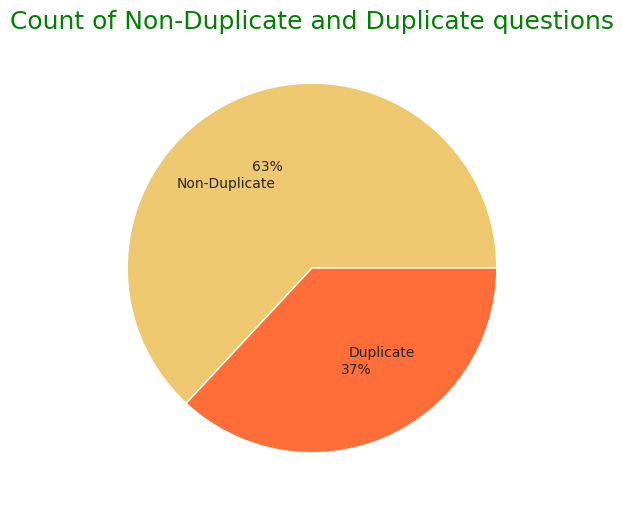

In [ ]:
label=['Non-Duplicate', 'Duplicate'] 
color=sns.color_palette('rainbow')[4:6]
plt.figure(figsize=(6,6))
plt.pie(x=class_balance['Count'], labels=label, colors=color, autopct='%.0f%%' , labeldistance=0.5)
plt.title("Count of Non-Duplicate and Duplicate questions", fontsize=18, color='green');

<h3 style="background:lightblue; color:blue; line-height:1.5; font-family:Arial Black; text-align:left">Text Preprocessing</h3>

In [ ]:
import contractions
import re

In [ ]:
def clean_test_for_sample_data(text):
    text=str(text).lower()
    text=text.replace('%', ' percent')
    text=text.replace('$', ' dollar ')
    text=text.replace('₹', ' rupee ')
    text=text.replace('€', ' euro ')
    text=text.replace('@', ' at ')
        
    text=text.replace(',000,000,000 ', 'b ')
    text=text.replace(',000,000 ', 'm ')
    text=text.replace(',000 ', 'k ')
    text=re.sub(r'([0-9]+)000000000', r'\1b', text)
    text=re.sub(r'([0-9]+)000000', r'\1m', text)
    text=re.sub(r'([0-9]+)000', r'\1k', text)
    pattern=re.compile('\W')
    text=re.sub(pattern, ' ', text).strip()
    #text=" ".join(text)
    text=re.sub("<.*?>", "", text)
    text=contractions.fix(text)
    text=re.sub(" +", " ", text)
    #text=text.strip()
    return text

balanced['question1']=balanced['question1'].apply(clean_test_for_sample_data)
balanced['question2']=balanced['question2'].apply(clean_test_for_sample_data)
pd.options.display.max_colwidth=10000000000000
balanced.head()

,question1,question2,is_duplicate
0,what minor would complement a computer science major,what is a good minor that will compliment a computer science major,1
1,how can i materialize an idea,what is the best way to materialize on an idea,1
2,what was the happiest day of your life and why was it,what was is will be the happiest day of your life,1
3,what role project manager has in agile projects,what is the role of project management in agile software development,1
4,who will win in america presidential elections in 2016,between trump and clinton who will win us presidential election,1


<h3 style="background:pink; color:blue; line-height:1.7; font-family:Arial Black; text-align:left">Extract Basic Features</h3>

<h3 style="background:lightblue; color:blue; line-height:1.2; font-family:Arial Black; text-align:left">1. Question Length</h3>

In [ ]:
balanced['que1_len']=balanced['question1'].str.len()
balanced['que2_len']=balanced['question2'].str.len()

<h3 style="background:yellow; color:blue; line-height:1; font-family:Arial Black; text-align:left">Anayze Question Length column</h3>

In [ ]:
print("Statistics on Question-1 Length")
print(balanced['que1_len'].describe().T)
print("--"*30)
print("Statistics on Question-2 Length")
print(balanced['que2_len'].describe().T)
print("--"*30)
print("Statistics on Question-1 Length when Non-Duplicate")
print(balanced[balanced['is_duplicate']==0]['que1_len'].describe().T)
print("--"*30)
print("Statistics on Question-1 Length when Duplicate")
print(balanced[balanced['is_duplicate']==1]['que1_len'].describe().T)
print("--"*30)
print("Statistics on Question-2 Length when Non-Duplicate")
print(balanced[balanced['is_duplicate']==0]['que2_len'].describe().T)
print("--"*30)
print("Statistics on Question-2 Length when Duplicate")
print(balanced[balanced['is_duplicate']==1]['que2_len'].describe().T)
print("--"*30)

Statistics on Question-1 Length
count    50000.000000
mean        56.855320
std         28.650849
min          0.000000
25%         38.000000
50%         50.000000
75%         68.000000
max        435.000000
Name: que1_len, dtype: float64
------------------------------------------------------------
Statistics on Question-2 Length
count    50000.000000
mean        57.186300
std         31.070809
min          2.000000
25%         37.000000
50%         49.000000
75%         68.000000
max        616.000000
Name: que2_len, dtype: float64
------------------------------------------------------------
Statistics on Question-1 Length when Non-Duplicate
count    25000.000000
mean        62.219440
std         32.462902
min          0.000000
25%         40.000000
50%         54.000000
75%         76.000000
max        391.000000
Name: que1_len, dtype: float64
------------------------------------------------------------
Statistics on Question-1 Length when Duplicate
count    25000.000000
mean        

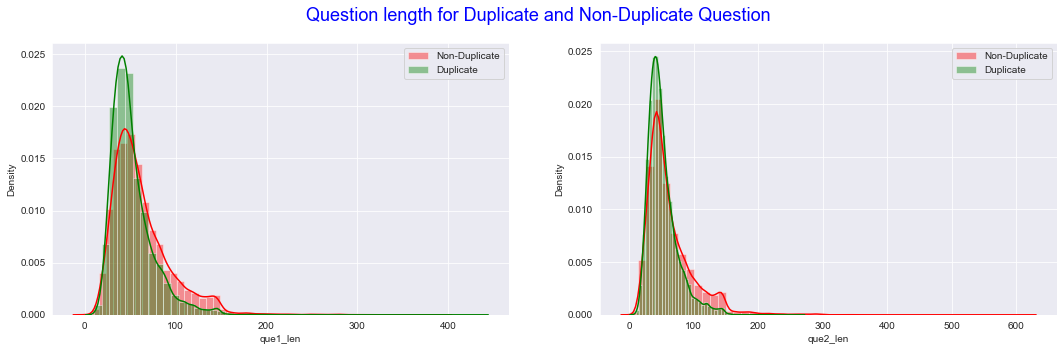

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(121)
sns.distplot(balanced[balanced['is_duplicate'] == 0]['que1_len'], label='Non-Duplicate', color='red')
sns.distplot(balanced[balanced['is_duplicate'] == 1]['que1_len'], label='Duplicate', color='green')
plt.legend();

plt.subplot(122)
sns.distplot(balanced[balanced['is_duplicate'] == 0]['que2_len'], label='Non-Duplicate', color='red')
sns.distplot(balanced[balanced['is_duplicate'] == 1]['que2_len'], label='Duplicate', color='green')
plt.legend();

plt.suptitle("Question length for Duplicate and Non-Duplicate Question", color='blue', fontsize=18);

**<code style="color:red;">Mean and standard deviation of duplicate question pair is lower than the Non-Duplicate question pairs. From Grapgh the peak for Duplicate question is slightly higher than Non-Duplicate. But Cannot distinguish Duplicate and Non-Duplicate question pair exactly on the basis of question lengths.</code>**

<h3 style="background:lightblue; color:blue; line-height:1.2; font-family:Arial Black; text-align:left">2. Number of Words in Question</h3>

In [ ]:
balanced['que1_num_words'] =balanced['question1'].apply(lambda sent: len(sent.split()))
balanced['que2_num_words'] =balanced['question2'].apply(lambda sent: len(sent.split()))

<h3 style="background:yellow; color:blue; line-height:1; font-family:Arial Black; text-align:left">Anayze Count of Question Words column</h3>

In [ ]:
print("Statistics on Question-1 Word Count")
print(balanced['que1_num_words'].describe().T)
print("--"*30)
print("Statistics on Question-2 Word Count")
print(balanced['que2_len'].describe().T)
print("--"*30)
print("Statistics on Question-1 Word Count when Non-Duplicate")
print(balanced[balanced['is_duplicate']==0]['que1_num_words'].describe().T)
print("--"*30)
print("Statistics on Question-1 Word Count when Duplicate")
print(balanced[balanced['is_duplicate']==1]['que1_num_words'].describe().T)
print("--"*30)
print("Statistics on Question-2 Word Count when Non-Duplicate")
print(balanced[balanced['is_duplicate']==0]['que2_num_words'].describe().T)
print("--"*30)
print("Statistics on Question-2 Word Count when Duplicate")
print(balanced[balanced['is_duplicate']==1]['que2_num_words'].describe().T)
print("--"*30)

Statistics on Question-1 Word Count
count    50000.000000
mean        10.904280
std          5.402538
min          0.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         83.000000
Name: que1_num_words, dtype: float64
------------------------------------------------------------
Statistics on Question-2 Word Count
count    50000.000000
mean        57.186300
std         31.070809
min          2.000000
25%         37.000000
50%         49.000000
75%         68.000000
max        616.000000
Name: que2_len, dtype: float64
------------------------------------------------------------
Statistics on Question-1 Word Count when Non-Duplicate
count    25000.000000
mean        11.856160
std          6.182106
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         74.000000
Name: que1_num_words, dtype: float64
------------------------------------------------------------
Statistics on Question-1 Word Count when Duplicate
count 

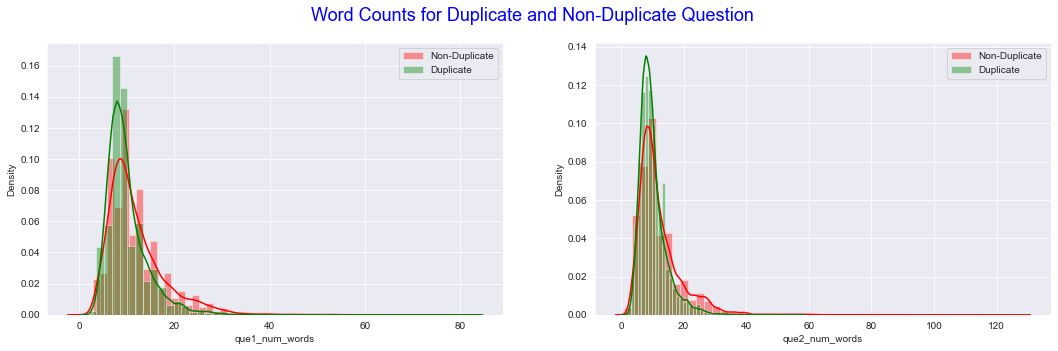

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(121)
sns.distplot(balanced[balanced['is_duplicate'] == 0]['que1_num_words'], label='Non-Duplicate', color='red')
sns.distplot(balanced[balanced['is_duplicate'] == 1]['que1_num_words'], label='Duplicate', color='green')
plt.legend();

plt.subplot(122)
sns.distplot(balanced[balanced['is_duplicate'] == 0]['que2_num_words'], label='Non-Duplicate', color='red')
sns.distplot(balanced[balanced['is_duplicate'] == 1]['que2_num_words'], label='Duplicate', color='green')
plt.legend();

plt.suptitle("Word Counts for Duplicate and Non-Duplicate Question", color='blue', fontsize=18);

**<code style="color:red;">Mean and Standard Deviation for duplicate question pair is lower than Non-Duplicate question pair. From Grapgh the peak for Duplicate question is slightly higher than Non-Duplicate. Although from graph we cannot exactly distiguish the Duplicate and Non Duplicate question pairs.</code>**

<h3 style="background:lightblue; color:blue; line-height:1.2; font-family:Arial Black; text-align:left">3. Total Words in both Questions</h3>

In [ ]:
def total_words(row):
    q1_w=set(map(lambda x: x.lower().strip(), row['question1'].split()))
    q2_w=set(map(lambda x: x.lower().strip(), row['question2'].split()))
    return len(q1_w) + len(q2_w)

balanced['total_words']=balanced.apply(total_words, axis=1)

<h3 style="background:yellow; color:blue; line-height:1; font-family:Arial Black; text-align:left">Anayze Total Words column</h3>

In [ ]:
print("Statistics on Total Words when Duplicate")
print(balanced[balanced['is_duplicate']==1]['total_words'].describe().T)
print("--"*30)
print("Statistics on Total Word Count when Non-Duplicate")
print(balanced[balanced['is_duplicate']==0]['total_words'].describe().T)
print("--"*30)

Statistics on Total Words when Duplicate
count    25000.000000
mean        19.162480
std          6.645041
min          6.000000
25%         15.000000
50%         18.000000
75%         22.000000
max        108.000000
Name: total_words, dtype: float64
------------------------------------------------------------
Statistics on Total Word Count when Non-Duplicate
count    25000.000000
mean        22.578000
std          9.340358
min          5.000000
25%         16.000000
50%         21.000000
75%         27.000000
max        115.000000
Name: total_words, dtype: float64
------------------------------------------------------------


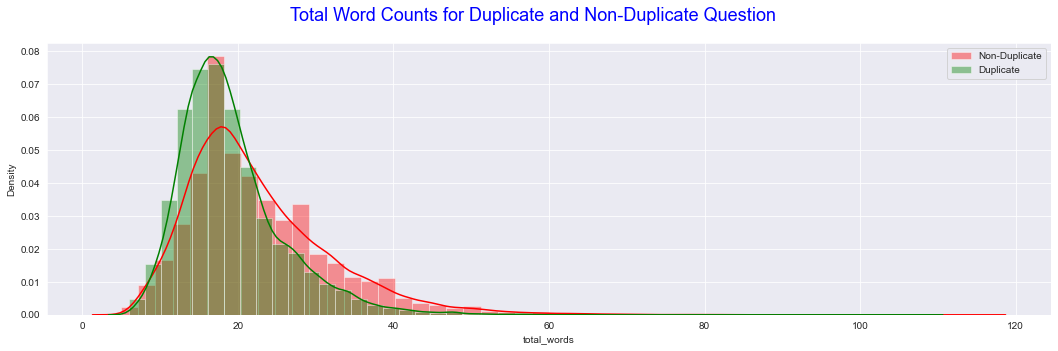

In [ ]:
plt.figure(figsize=(18,5))
sns.distplot(balanced[balanced['is_duplicate'] == 0]['total_words'], label='Non-Duplicate', color='red')
sns.distplot(balanced[balanced['is_duplicate'] == 1]['total_words'], label='Duplicate', color='green')
plt.legend();
plt.suptitle("Total Word Counts for Duplicate and Non-Duplicate Question", color='blue', fontsize=18);

**<code style="color:red;">Mean and Standard Deviation for duplicate question pair is higher than Non-Duplicate question pair. From Grapgh the peak for Duplicate question is slightly higher than Non-Duplicate. Although from graph we cannot exactly distiguish the Duplicate and Non Duplicate question pairs.</code>**

<h3 style="background:lightblue; color:blue; line-height:1.2; font-family:Arial Black; text-align:left">4. Common Words in Questions</h3>

In [ ]:
def common_words(row):
    q1_w=set(map(lambda x: x.lower().strip(), row['question1'].split()))
    q2_w=set(map(lambda x: x.lower().strip(), row['question2'].split()))
    return len(q1_w)&len(q2_w)

balanced['common_words']=balanced.apply(common_words, axis=1)

<h3 style="background:yellow; color:blue; line-height:1; font-family:Arial Black; text-align:left">Anayze Count of Common Words column</h3>

In [ ]:
print("Statistics on Common Words when Duplicate")
print(balanced[balanced['is_duplicate']==1]['common_words'].describe().T)
print("--"*30)
print("Statistics on Common Word Count when Non-Duplicate")
print(balanced[balanced['is_duplicate']==0]['common_words'].describe().T)
print("--"*30)

Statistics on Common Words when Duplicate
count    25000.000000
mean         6.265680
std          4.330303
min          0.000000
25%          2.000000
50%          8.000000
75%          8.000000
max         32.000000
Name: common_words, dtype: float64
------------------------------------------------------------
Statistics on Common Word Count when Non-Duplicate
count    25000.000000
mean         6.491960
std          5.083897
min          0.000000
25%          2.000000
50%          8.000000
75%          9.000000
max         41.000000
Name: common_words, dtype: float64
------------------------------------------------------------


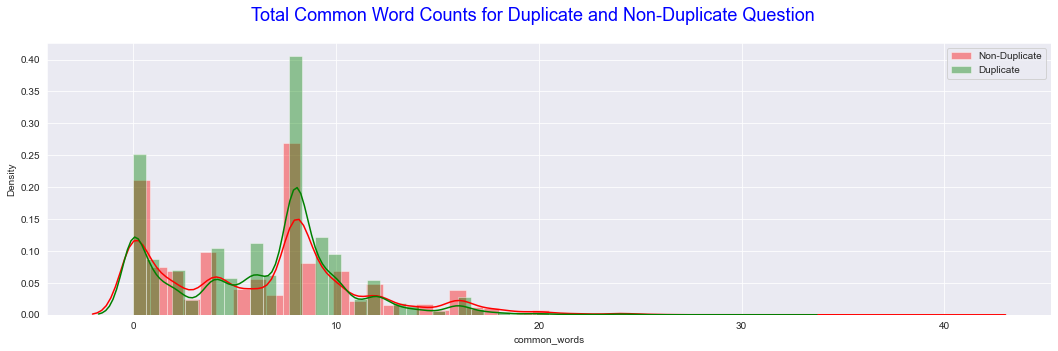

In [ ]:
plt.figure(figsize=(18,5))
sns.distplot(balanced[balanced['is_duplicate'] == 0]['common_words'], label='Non-Duplicate', color='red')
sns.distplot(balanced[balanced['is_duplicate'] == 1]['common_words'], label='Duplicate', color='green')
plt.legend();
plt.suptitle("Total Common Word Counts for Duplicate and Non-Duplicate Question", color='blue', fontsize=18);

**<code style="color:red;">There is no much difference between Mean and Standard Deviation for duplicate question pair and Non-Duplicate question pair. From Grapgh the peak for Duplicate question and Non-Duplicate question is neck to neck. From graph we cannot exactly distiguish the Duplicate and Non Duplicate question pairs.</code>**

<h3 style="background:lightblue; color:blue; line-height:1.2; font-family:Arial Black; text-align:left">5. Word Sharing</h3>

In [ ]:
balanced['shared_words'] = round(balanced['common_words']/balanced['total_words'], 2)

<h3 style="background:yellow; color:blue; line-height:1; font-family:Arial Black; text-align:left">Anayze Word Sharing column</h3>

In [ ]:
print("Statistics on Word Sharing when Duplicate")
print(balanced[balanced['is_duplicate']==1]['shared_words'].describe().T)
print("--"*30)
print("Statistics on Word Sharing when Non-Duplicate")
print(balanced[balanced['is_duplicate']==0]['shared_words'].describe().T)
print("--"*30)

Statistics on Word Sharing when Duplicate
count    25000.000000
mean         0.326673
std          0.189764
min          0.000000
25%          0.120000
50%          0.420000
75%          0.480000
max          0.500000
Name: shared_words, dtype: float64
------------------------------------------------------------
Statistics on Word Sharing when Non-Duplicate
count    25000.000000
mean         0.293140
std          0.191106
min          0.000000
25%          0.070000
50%          0.380000
75%          0.460000
max          0.500000
Name: shared_words, dtype: float64
------------------------------------------------------------


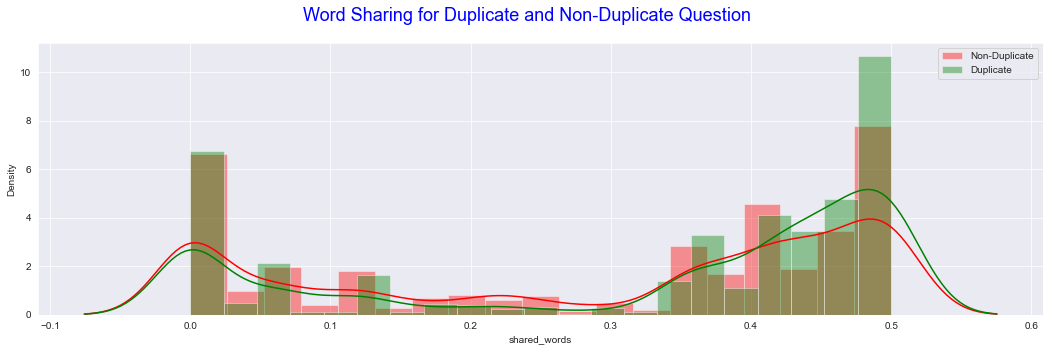

In [ ]:
plt.figure(figsize=(18,5))
sns.distplot(balanced[balanced['is_duplicate'] == 0]['shared_words'], label='Non-Duplicate', color='red')
sns.distplot(balanced[balanced['is_duplicate'] == 1]['shared_words'], label='Duplicate', color='green')
plt.legend();
plt.suptitle(" Word Sharing for Duplicate and Non-Duplicate Question", color='blue', fontsize=18);

**<code style="color:red;">Cannot Distiguish Duplicate and Non-Duplicate Question Pairs on the basic of Word sharing.</code>**

<h3 style="background:pink; color:blue; line-height:1.7; font-family:Arial Black; text-align:left">Extract Token Based Features</h3>

1. **cwc_min:** Ratio of the number of common words to the length of the smaller question
2. **cwc_max:** Ratio of the number of common words to the length of the larger question
3. **csc_min:** Ratio of the number of common stop words to the smaller stop word count among the two questions
4. **csc_max:** Ratio of the number of common stop words to the larger stop word count among the two questions
5. **ctc_min:** Ratio of the number of common tokens to the smaller token count among the two questions
6. **ctc_max:** Ratio of the number of common tokens to the larger token count among the two questions
7. **last_word_eq:** 1 if the last word in the two questions is same, 0 otherwise
8. **first_word_eq:** 1 if the first word in the two questions is same, 0 otherwise

In [ ]:
from nltk.corpus import stopwords

In [ ]:
def extract_token_features(row):
    q1=row['question1']
    q2=row['question2']
    SAFE_DIV=0.0001
    STOP_WORDS=stopwords.words("english")   #Stopwords
    token_features=[0.0]*8
    
    q1_tokens=q1.split()    #tokens in question1
    q2_tokens=q2.split()    #tokens in question2
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features

    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])     #non-stopwords in question1
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])     #non-stopwords in question2
    
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])         #stopwords in question1
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])         #stopwords in question2
    
    common_word_count = len(q1_words.intersection(q2_words))                   #non-stopword count
    common_stop_count = len(q1_stops.intersection(q2_stops))                   #common stopword count
    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))        #common token count
    
    token_features[0]=common_word_count/(min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1]=common_word_count/(max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2]=common_stop_count/(min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3]=common_stop_count/(max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4]=common_token_count/(min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5]=common_token_count/(max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])   #last word same or not
    token_features[7]=int(q1_tokens[0]==q2_tokens[0])     #first word same or not
    
    return token_features

In [ ]:
token_features=balanced.apply(extract_token_features, axis=1)

balanced["cwc_min"]=list(map(lambda x: x[0], token_features))
balanced["cwc_max"]=list(map(lambda x: x[1], token_features))
balanced["csc_min"]=list(map(lambda x: x[2], token_features))
balanced["csc_max"]=list(map(lambda x: x[3], token_features))
balanced["ctc_min"]= list(map(lambda x: x[4], token_features))
balanced["ctc_max"]=list(map(lambda x: x[5], token_features))
balanced["last_word_eq"]=list(map(lambda x: x[6], token_features))
balanced["first_word_eq"]=list(map(lambda x: x[7], token_features))

balanced.head(2)

,question1,question2,is_duplicate,que1_len,que2_len,que1_num_words,que2_num_words,total_words,common_words,shared_words,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,what minor would complement a computer science major,what is a good minor that will compliment a computer science major,1,52,66,8,12,19,8,0.42,0.666656,0.666656,0.999950,0.399992,0.749991,0.499996,1.0,1.0
1,how can i materialize an idea,what is the best way to materialize on an idea,1,29,46,6,10,16,2,0.12,0.999950,0.499988,0.249994,0.166664,0.499992,0.299997,1.0,0.0


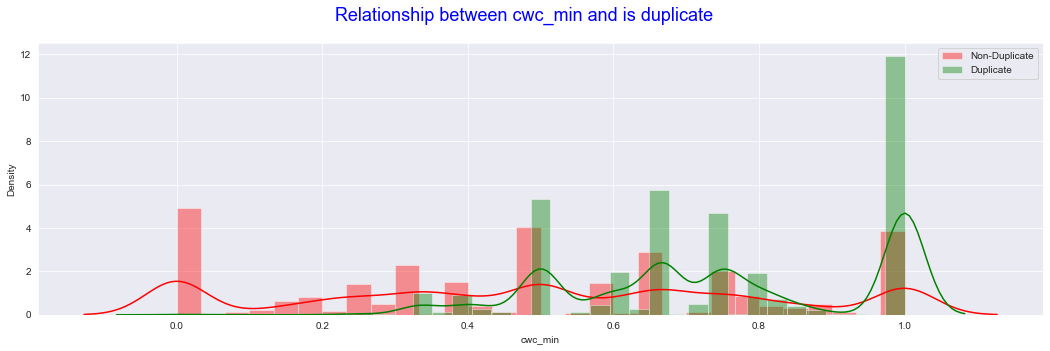

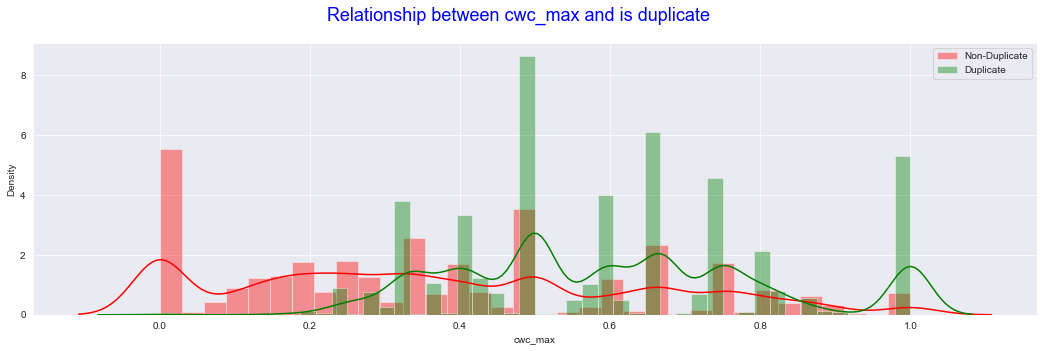

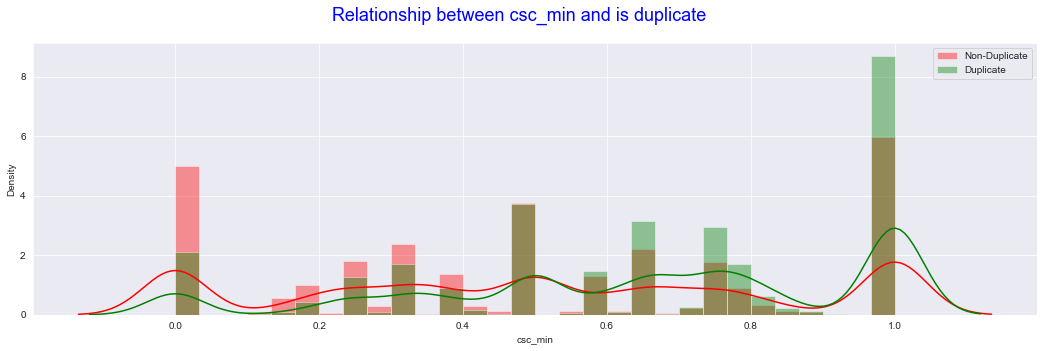

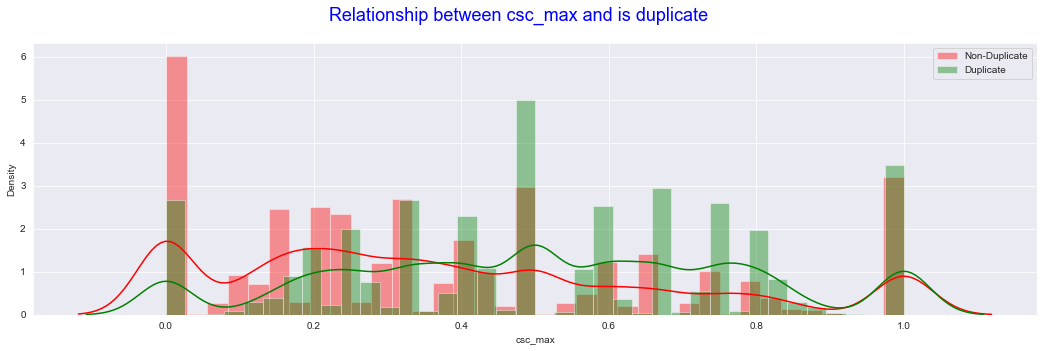

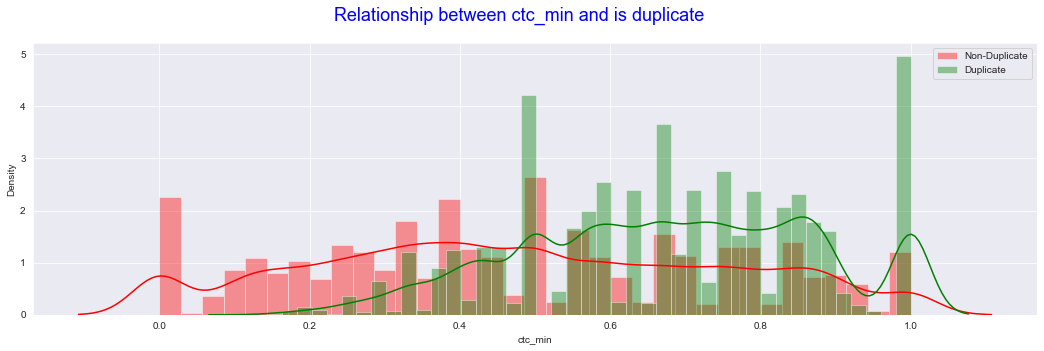

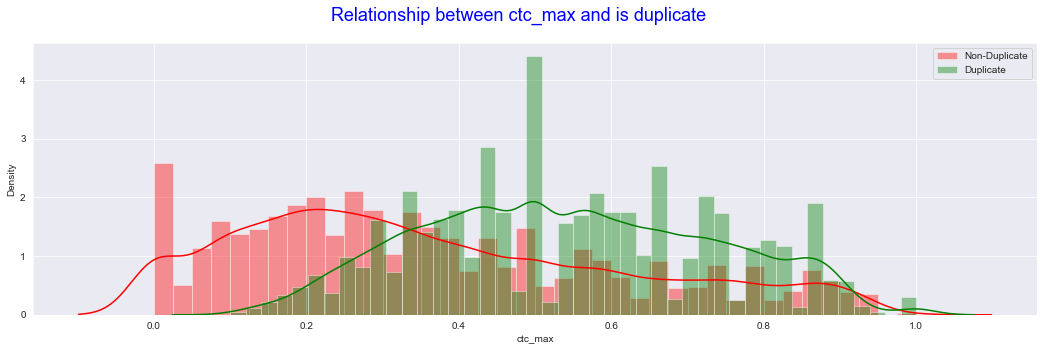

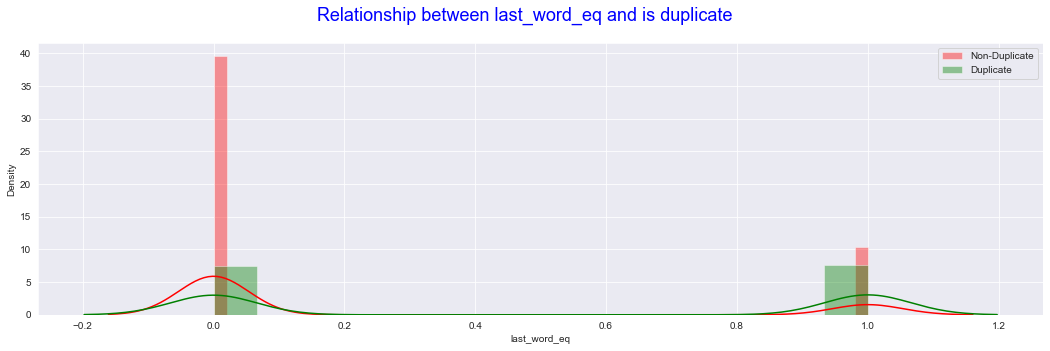

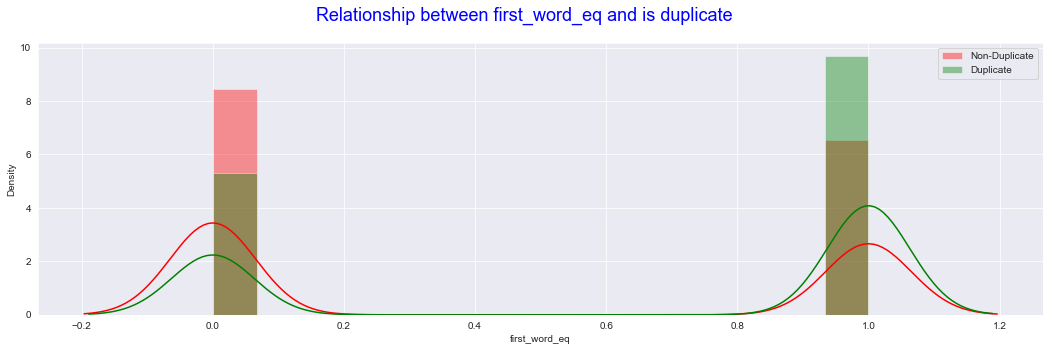

In [ ]:
token_features_df=token_features_df.drop('is_duplicate', axis=1)
for col in token_features_df.columns:
    plt.figure(figsize=(18,5))
    sns.distplot(balanced[balanced['is_duplicate'] == 0][col], label='Non-Duplicate', color='red')
    sns.distplot(balanced[balanced['is_duplicate'] == 1][col], label='Duplicate', color='green')
    plt.legend();
    plt.suptitle("Relationship between {} and is duplicate".format(col), color='blue', fontsize=18);

**<code style="color:red;">It is possible to seperate class 0 and class 1 on the basic of token features.</code>**

<h3 style="background:pink; color:blue; line-height:1.7; font-family:Arial Black; text-align:left">Extract Length Based Features</h3>

1. **mean_len:** Average of both questions length.
2. **abs_len_diff:** Absolute difference between the length of the two questions.
3. **long_substr_ratio:** The ratio of the length of the longest substring between two questions is divided by the length of the smaller questions.

In [ ]:
import distance
def extract_length_features(row):
    q1=row['question1']
    q2=row['question2']
    length_features=[0.0]*3
    
    q1_tokens=q1.split()   #question1 token
    q2_tokens=q2.split()   #question2 token
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features
    
    length_features[0]=abs(len(q1_tokens) - len(q2_tokens))            #absolute length difference
    length_features[1]=(len(q1_tokens) + len(q2_tokens))/2             #average token length
    strs=list(distance.lcsubstrings(q1, q2))                           #longest substring
    length_features[2]=len(strs[0]) / (min(len(q1), len(q2)) + 1)      #longest substring ratio
    
    return length_features

In [ ]:
length_features=balanced.apply(extract_length_features, axis=1)

balanced['abs_len_diff'] = list(map(lambda x: x[0], length_features))
balanced['mean_len'] = list(map(lambda x: x[1], length_features))
balanced['long_substr_ratio'] = list(map(lambda x: x[2], length_features))
balanced.head(2)

,question1,question2,is_duplicate,que1_len,que2_len,que1_num_words,que2_num_words,total_words,common_words,shared_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,long_substr_ratio
0,what minor would complement a computer science major,what is a good minor that will compliment a computer science major,1,52,66,8,12,19,8,0.42,...,0.666656,0.999950,0.399992,0.749991,0.499996,1.0,1.0,4.0,10.0,0.547170
1,how can i materialize an idea,what is the best way to materialize on an idea,1,29,46,6,10,16,2,0.12,...,0.499988,0.249994,0.166664,0.499992,0.299997,1.0,0.0,4.0,8.0,0.433333


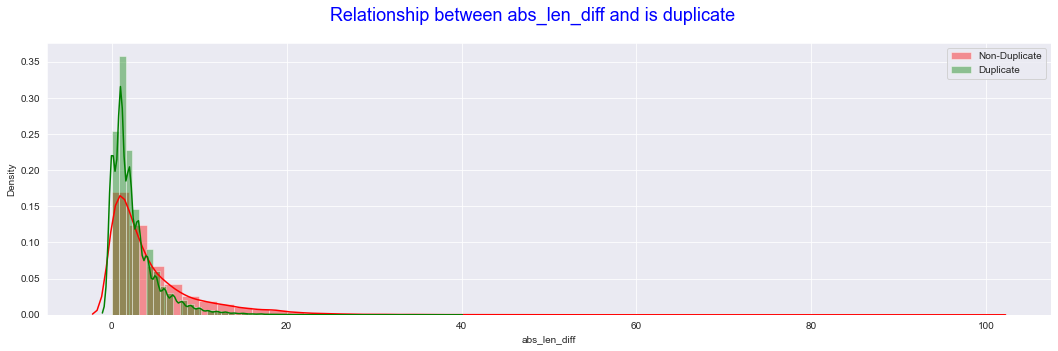

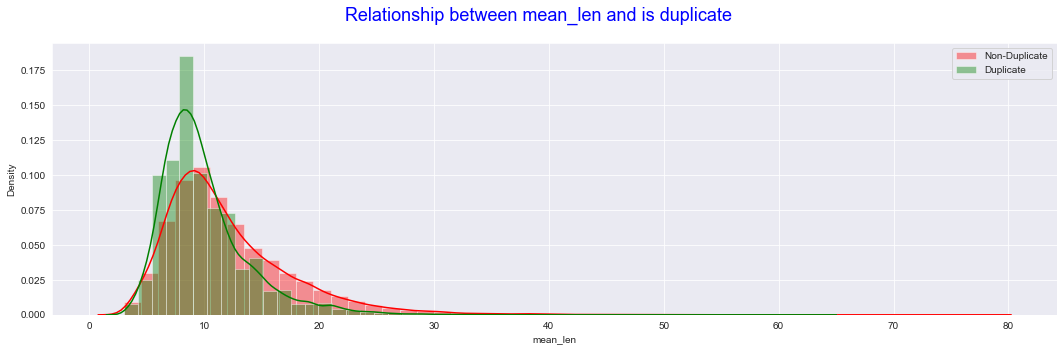

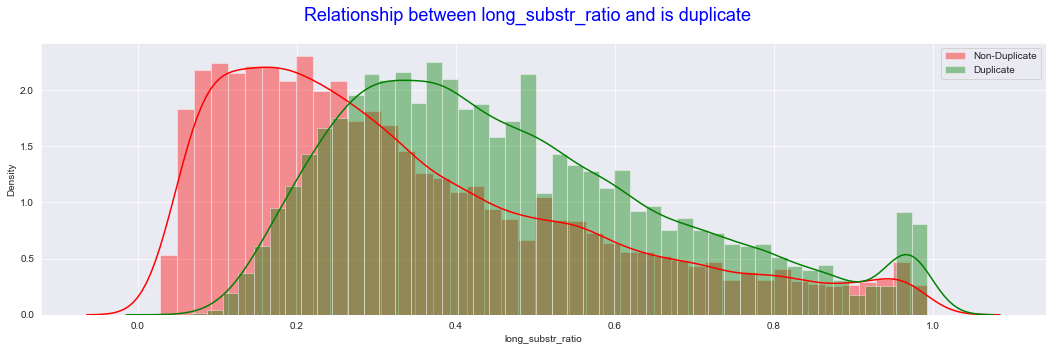

In [ ]:
length_features_df=length_features_df.drop('is_duplicate', axis=1)
for col in length_features_df.columns:
    plt.figure(figsize=(18,5))
    sns.distplot(balanced[balanced['is_duplicate'] == 0][col], label='Non-Duplicate', color='red')
    sns.distplot(balanced[balanced['is_duplicate'] == 1][col], label='Duplicate', color='green')
    plt.legend();
    plt.suptitle("Relationship between {} and is duplicate".format(col), color='blue', fontsize=18);

**<code style="color:red;">Clearly from graphs we can say that it is possible to seperate class 0 and class 1 from these length based features.</code>**

<h3 style="background:pink; color:blue; line-height:1.7; font-family:Arial Black; text-align:left">Extract Fuzzy Features</h3>

1. **fuzz_ratio:** fuzz_ratio score from fuzzywuzzy, higher the score higher the similarity.
2. **fuzz_partial_ratio:** fuzz_partial_ratio from fuzzywuzzy, if one sentence words present in other, score will be high. In other word one string shoulb subset of other so the score will be high.
3. **token_sort_ratio:** token_sort_ratio from fuzzywuzzy, If the same sentence occure with different ordering. then score will be high.
4. **token_set_ratio:** token_set_ratio from fuzzywuzzy, It consider set of unique word to compare to other string.

In [ ]:
from fuzzywuzzy import fuzz
def extract_fuzzy_features(row):
    q1 = row['question1']
    q2 = row['question2']
    fuzzy_features = [0.0]*4
    
    fuzzy_features[0] = fuzz.QRatio(q1, q2)              #fuzzy ration
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)       #fuzzy partial_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)    #token sort ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)     #token set ratio

    return fuzzy_features

In [ ]:
fuzzy_features=balanced.apply(extract_fuzzy_features, axis=1)

balanced['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
balanced['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
balanced['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
balanced['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))
balanced.head(2)

,question1,question2,is_duplicate,que1_len,que2_len,que1_num_words,que2_num_words,total_words,common_words,shared_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,long_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,what minor would complement a computer science major,what is a good minor that will compliment a computer science major,1,52,66,8,12,19,8,0.42,...,0.499996,1.0,1.0,4.0,10.0,0.547170,81,85,81,83
1,how can i materialize an idea,what is the best way to materialize on an idea,1,29,46,6,10,16,2,0.12,...,0.299997,1.0,0.0,4.0,8.0,0.433333,64,72,53,79


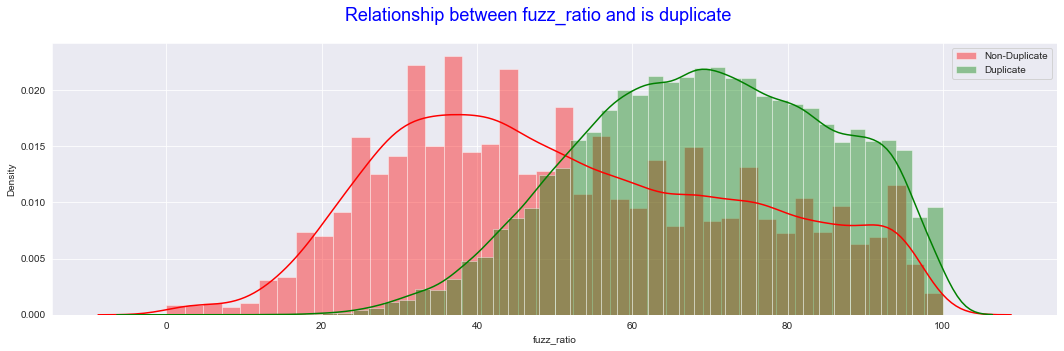

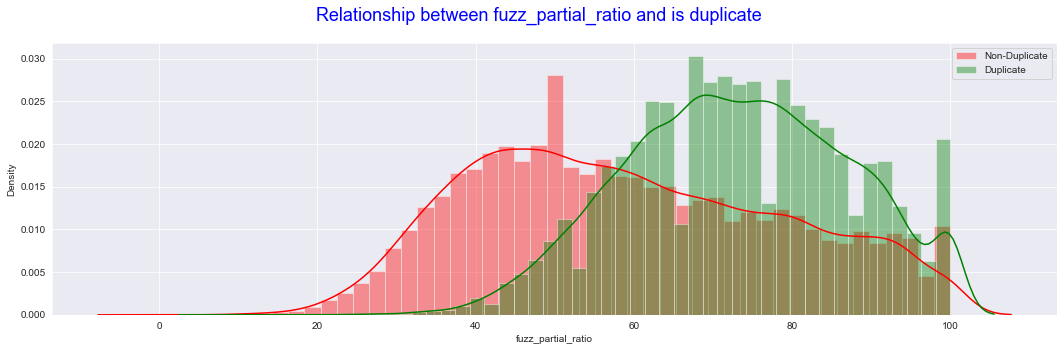

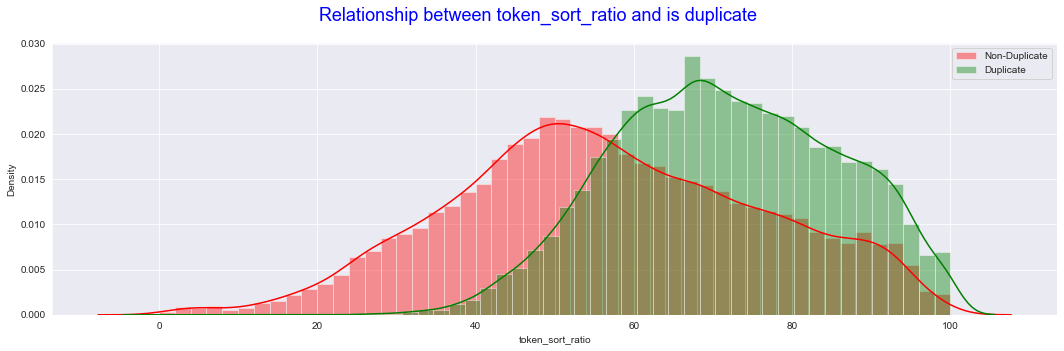

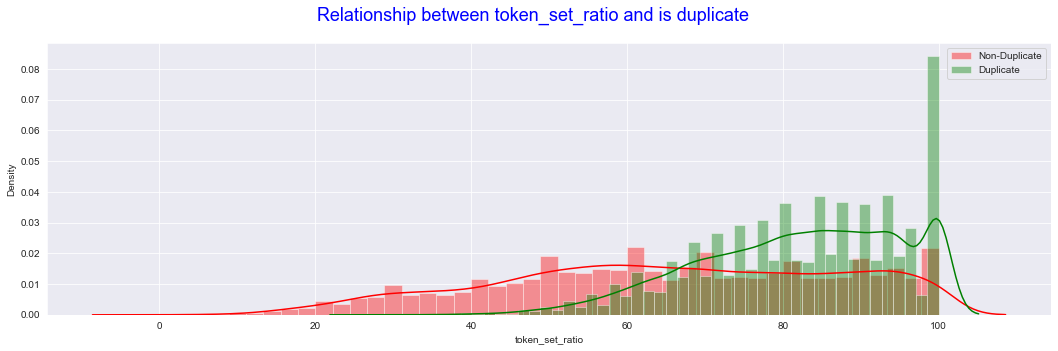

In [ ]:
fuzzy_features_df=fuzzy_features_df.drop('is_duplicate', axis=1)
for col in fuzzy_features_df.columns:
    plt.figure(figsize=(18,5))
    sns.distplot(balanced[balanced['is_duplicate'] == 0][col], label='Non-Duplicate', color='red')
    sns.distplot(balanced[balanced['is_duplicate'] == 1][col], label='Duplicate', color='green')
    plt.legend();
    plt.suptitle("Relationship between {} and is duplicate".format(col), color='blue', fontsize=18);

**<code style="color:red;">Clearly from graph we can seperate two classes.</code>**

### Save this Dataset with extracted features.

In [3]:
#balanced.to_csv("data/feat_extr_data_full.csv", index=False)
balanced=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Final_ Project_Quora_Question_Pair_Similarity/data/feat_extr_data_full.csv")
balanced.head()

,question1,question2,is_duplicate,que1_len,que2_len,que1_num_words,que2_num_words,total_words,common_words,shared_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,long_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,23,8,0.35,...,0.785709,0.0,1.0,2.0,13.0,0.017544,93,100,93,100
1,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15,24,10,0.42,...,0.466664,0.0,1.0,5.0,12.5,0.020408,65,73,63,86
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,24,10,0.42,...,0.285712,0.0,1.0,4.0,12.0,0.016949,43,46,63,63
3,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is div...,0,48,59,11,13,20,10,0.50,...,0.000000,0.0,0.0,2.0,12.0,0.163265,9,11,24,28
4,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,20,5,0.25,...,0.307690,0.0,1.0,6.0,10.0,0.102564,36,55,47,67


In [4]:
balanced.shape

(404287, 25)

In [5]:
balanced.isna().sum()

question1             14
question2              6
is_duplicate           0
que1_len               0
que2_len               0
que1_num_words         0
que2_num_words         0
total_words            0
common_words           0
shared_words           0
cwc_min                0
cwc_max                0
csc_min                0
csc_max                0
ctc_min                0
ctc_max                0
last_word_eq           0
first_word_eq          0
abs_len_diff           0
mean_len               0
long_substr_ratio      0
fuzz_ratio             0
fuzz_partial_ratio     0
token_sort_ratio       0
token_set_ratio        0
dtype: int64

In [6]:
balanced.dropna(inplace=True)
balanced.isna().sum()

question1             0
question2             0
is_duplicate          0
que1_len              0
que2_len              0
que1_num_words        0
que2_num_words        0
total_words           0
common_words          0
shared_words          0
cwc_min               0
cwc_max               0
csc_min               0
csc_max               0
ctc_min               0
ctc_max               0
last_word_eq          0
first_word_eq         0
abs_len_diff          0
mean_len              0
long_substr_ratio     0
fuzz_ratio            0
fuzz_partial_ratio    0
token_sort_ratio      0
token_set_ratio       0
dtype: int64

In [7]:
balanced.duplicated().sum()

722

In [8]:
balanced.drop_duplicates(inplace=True)
balanced.duplicated().sum()

0

<h3 style="background:lightblue; color:blue; line-height:1.5; font-family:Arial Black; text-align:left">Divide data into Input and Output</h3>

In [9]:
X=balanced.drop("is_duplicate", axis=1)
y=balanced['is_duplicate']

<h3 style="background:lightblue; color:blue; line-height:1.5; font-family:Arial Black; text-align:left">Train Test Split</h3>

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0)

<h3 style="background:lightblue; color:blue; line-height:1.5; font-family:Arial Black; text-align:left">Text to numeric conversion</h3>
<h3 style="background:yellow; color:blue; line-height:1.3; font-family:Arial Black; text-align:left">Technique 1: Count Vectorizer</h3>

In [11]:
questions_train=list(x_train['question1'])+list(x_train['question2'])
questions_test=list(x_test['question1'])+list(x_test['question2'])
questions_test[:5]

['what can i do to be comfortable with myself',
 'how do i write the introduction of an essay',
 'what was the best day of your life',
 'what are advantages of affiliate marketing',
 'what are the victoria s secret models like in real life']

In [12]:
extracted_features=['que1_len', 'que2_len',
       'que1_num_words', 'que2_num_words', 'total_words', 'common_words',
       'shared_words', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min',
       'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'long_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio']

In [13]:
extracted_features_train=x_train[extracted_features]
extracted_features_test=x_test[extracted_features]

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cnv=CountVectorizer(ngram_range=(1, 2))
cnv_fit=cnv.fit(questions_train)
x_train_ques=cnv_fit.transform(questions_train)
q1_array=x_train_ques[:(x_train_ques.shape[0]//2),]  #Vector containing question1
q2_array=x_train_ques[(x_train_ques.shape[0]//2):,]  #Vector containing question2

In [15]:
from scipy.sparse import hstack
x_train_tf = hstack((q1_array, q2_array, extracted_features_train))  #Concatenating as a single Vector
print("X train Transformed Shape", x_train_tf.shape)
print("y train Shape", y_train.shape)

X train Transformed Shape (322836, 2180642)
y train Shape (322836,)


### Now Vectorize x test

In [16]:
x_test_ques=cnv_fit.transform(questions_test)
q1_array=x_test_ques[:(x_test_ques.shape[0]//2),]
q2_array=x_test_ques[(x_test_ques.shape[0]//2):,]
x_test_tf = hstack((q1_array, q2_array, extracted_features_test))
print("X test Transformed Shape", x_test_tf.shape)
print("y test Shape", y_test.shape)

X test Transformed Shape (80709, 2180642)
y test Shape (80709,)


In [17]:
len(cnv.vocabulary_)

1090310

**<code style="color:green">We have 10,90,310 unique vocabulary.</code>**

<h3 style="background:lightblue; color:blue; line-height:1.5; font-family:Arial Black; text-align:left">Built Machine Learning Classification models and record the experiment using MLFLOW</h3>

<h3 style="background:lightblue; color:blue; line-height:1.3; font-family:Arial Black; text-align:left">Set Experiment</h3>

In [18]:
!pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 92.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-none-any.whl size=143860 sha256=d80f99fab9eec339593d1720f61242e47e22cc5850dbebf4faf13d3082d50471
  Stored in directory: /root/.cache/pip/wheel

In [19]:
import mlflow
mlflow.set_experiment("Advance Approach using extracted features")

2023/06/07 03:12:45 INFO mlflow.tracking.fluent: Experiment with name 'Advance Approach using extracted features' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/653379746134971170', creation_time=1686107565360, experiment_id='653379746134971170', last_update_time=1686107565360, lifecycle_stage='active', name='Advance Approach using extracted features', tags={}>

<h3 style="background:lightgreen; color:blue; line-height:1.3; font-family:Arial Black; text-align:left">1. Logistic Regression</h3>

----------------------------------------------------------
Acuuracy=0.7156946561102231
Precission=0.6284909993332839
Recall=0.5677954758399143
F1 Score=0.5966034949544671
----------------------------------------------------------
Confusion Matrix=



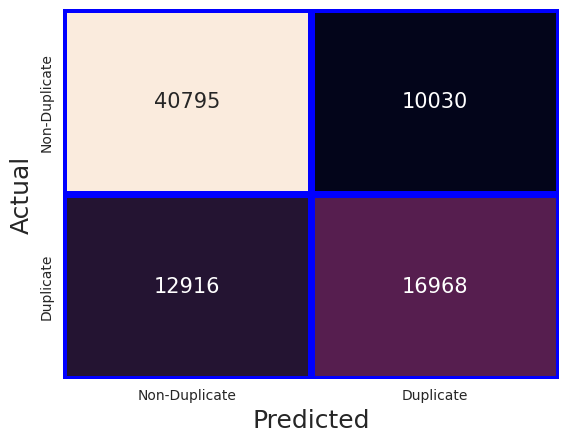

----------------------------------------------------------
Out of 80709 testing values 22946 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.76      0.80      0.78     50825
           1       0.63      0.57      0.60     29884

    accuracy                           0.72     80709
   macro avg       0.69      0.69      0.69     80709
weighted avg       0.71      0.72      0.71     80709

----------------------------------------------------------


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import pickle
with mlflow.start_run():
    mlflow.set_tag("Owner","Suraj H")
    mlflow.set_tag("Algorithm", "Logistic cnt")
    
    log_regression=LogisticRegression()
    log_regression.fit(x_train_tf,y_train)
    pickle.dump(log_regression, open("/content/resources_advance_approach_using_extracted_features/logistic_regression_cnt.pkl","wb"))
    
    y_pred=log_regression.predict(x_test_tf)
    acc=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    
    print("----------------------------------------------------------")
    print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
    print("----------------------------------------------------------")
    print("Confusion Matrix=\n")
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
                yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
    plt.xlabel("Predicted",fontsize=18)
    plt.ylabel("Actual",fontsize=18)
    plt.savefig("/content/resources_advance_approach_using_extracted_features/log_reg_cnt_conf_matrix.png")
    plt.show()
    print("----------------------------------------------------------")
    print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
    print("----------------------------------------------------------")
    print("Classification Report=\n", classification_report(y_test,y_pred))
    print("----------------------------------------------------------")
    
    mlflow.log_metrics({"Accuracy":acc, "Precision":precision, "Recall":recall, "F1 Score":f1})
    mlflow.sklearn.log_model(log_regression, artifact_path="models")
    mlflow.log_artifact("/content/resources_advance_approach_using_extracted_features/log_reg_cnt_conf_matrix.png")

**<code style="color:green">Inference:<br>1. Accuracy of the Logistic Regression is 72%. <br>2. Out of total non-duplicate predicted class 76% are accurate and Out of total duplicate predicted class 63% are accurate.<br>3. Out of total actual non-duplicates class 81% are predicted accuractely and Out of total actual duplicates class 56% are predicted accuractely.<br>4. f1 score for non-duplicate class is 78% and for duplicate class is 59%.<br>5. f1 score for both the classes should be high.</code>**

<h3 style="background:lightgreen; color:blue; line-height:1.3; font-family:Arial Black; text-align:left">2. XG Boost Classifier</h3>

----------------------------------------------------------
Acuuracy=0.8073449057725904
Precission=0.7481048149814808
Recall=0.7231963592557891
F1 Score=0.7354397427390129
----------------------------------------------------------
Confusion Matrix=



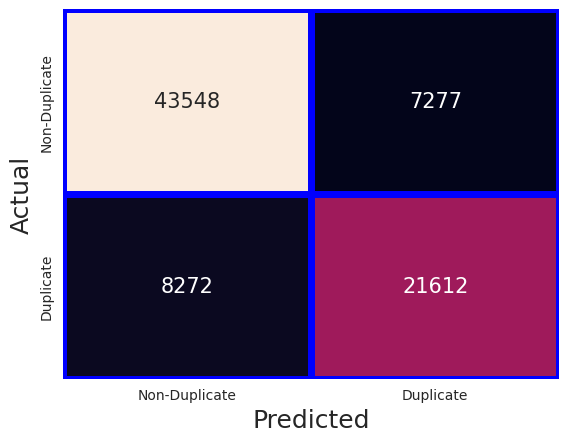

----------------------------------------------------------
Out of 80709 testing values 15549 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.84      0.86      0.85     50825
           1       0.75      0.72      0.74     29884

    accuracy                           0.81     80709
   macro avg       0.79      0.79      0.79     80709
weighted avg       0.81      0.81      0.81     80709

----------------------------------------------------------


In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import pickle
with mlflow.start_run():
    mlflow.set_tag("Owner","Suraj H")
    mlflow.set_tag("Algorithm", "XG Boost cnt")
    
    xgb_classifier=XGBClassifier()
    xgb_classifier.fit(x_train_tf,y_train)
    pickle.dump(xgb_classifier, open("/content/resources_advance_approach_using_extracted_features/xgboost_cnt.pkl","wb"))
    
    y_pred=xgb_classifier.predict(x_test_tf)
    acc=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    
    print("----------------------------------------------------------")
    print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
    print("----------------------------------------------------------")
    print("Confusion Matrix=\n")
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
                yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
    plt.xlabel("Predicted",fontsize=18)
    plt.ylabel("Actual",fontsize=18)
    plt.savefig("/content/resources_advance_approach_using_extracted_features/xgboost_cnt_conf_matrix.png")
    plt.show()
    print("----------------------------------------------------------")
    print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
    print("----------------------------------------------------------")
    print("Classification Report=\n", classification_report(y_test,y_pred))
    print("----------------------------------------------------------")
    
    mlflow.log_metrics({"Accuracy":acc, "Precision":precision, "Recall":recall, "F1 Score":f1})
    mlflow.sklearn.log_model(xgb_classifier, artifact_path="models")
    mlflow.log_artifact("/content/resources_advance_approach_using_extracted_features/xgboost_cnt_conf_matrix.png")

**<code style="color:green">Inference:<br>1. Accuracy of the XG Boost Classifier is 81%. <br>2. Out of total non-duplicate predicted class 84% are accurate and Out of total duplicate predicted class 75% are accurate.<br>3. Out of total actual non-duplicates class 86% are predicted accuractely and Out of total actual duplicates class 72% are predicted accuractely.<br>4. f1 score for non-duplicate class is 85% and for duplicate class is 74%.<br>5. f1 score for both the classes should be high.<br>6. False Negative count is very less hence XGBoost is suitable model.</code>**

**+---------------------------------+-------------------------------------------+------------------------------------------+-----------------------------------------+--------------------------------------+ +---------------------------------+-------------------------------------------+------------------------------------------+-----------------------------------------+--------------------------------------+**

<h3 style="background:yellow; color:blue; line-height:1.5; font-family:Arial Black; text-align:left">Technique-2 TF-IDF Vectorizer</h3>

<h3 style="background:lightblue; color:blue; line-height:1.3; font-family:Arial Black; text-align:left">Text to numerical conversion using TF-IDF</h3>

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(ngram_range=(1, 2))
tfidf_fit=tfidf.fit(questions_train)
x_train_ques=tfidf_fit.transform(questions_train)
q1_array=x_train_ques[:(x_train_ques.shape[0]//2),]  #Vector containing question1
q2_array=x_train_ques[(x_train_ques.shape[0]//2):,]  #Vector containing question2

In [23]:
from scipy.sparse import hstack
x_train_tf = hstack((q1_array, q2_array, extracted_features_train))  #Concatenating as a single Vector
print("X train Transformed Shape", x_train_tf.shape)
print("y train Shape", y_train.shape)

X train Transformed Shape (322836, 2180642)
y train Shape (322836,)


### Vectorize x test

In [24]:
x_test_ques=tfidf_fit.transform(questions_test)
q1_array=x_test_ques[:(x_test_ques.shape[0]//2),]
q2_array=x_test_ques[(x_test_ques.shape[0]//2):,]
x_test_tf = hstack((q1_array, q2_array, extracted_features_test))
print("X test Transformed Shape", x_test_tf.shape)
print("y test Shape", y_test.shape)

X test Transformed Shape (80709, 2180642)
y test Shape (80709,)


In [25]:
len(tfidf_fit.vocabulary_)

1090310

<h3 style="background:lightblue; color:blue; line-height:1.5; font-family:Arial Black; text-align:left">Built Machine Learning Classification models and record the experiment using MLFLOW</h3>

<h3 style="background:lightgreen; color:blue; line-height:1.3; font-family:Arial Black; text-align:left">1. Logistic Regression</h3>

----------------------------------------------------------
Acuuracy=0.6926736795152957
Precission=0.6024606696248487
Recall=0.4997657609423103
F1 Score=0.5463291509675531
----------------------------------------------------------
Confusion Matrix=



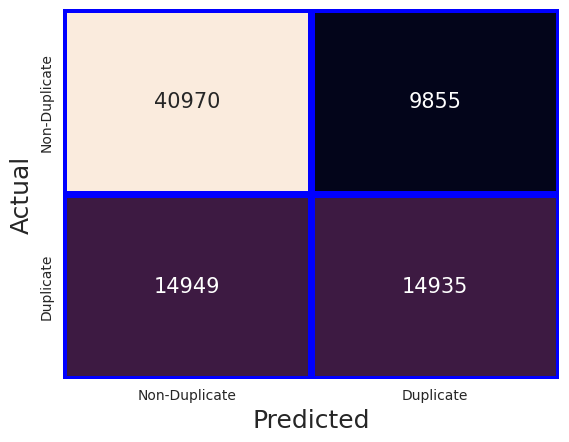

----------------------------------------------------------
Out of 80709 testing values 24804 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.73      0.81      0.77     50825
           1       0.60      0.50      0.55     29884

    accuracy                           0.69     80709
   macro avg       0.67      0.65      0.66     80709
weighted avg       0.68      0.69      0.69     80709

----------------------------------------------------------


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import pickle
with mlflow.start_run():
    mlflow.set_tag("Owner","Suraj H")
    mlflow.set_tag("Algorithm", "Logistic tfidf")
    
    log_regression=LogisticRegression()
    log_regression.fit(x_train_tf,y_train)
    pickle.dump(log_regression, open("/content/resources_advance_approach_using_extracted_features/logistic_regression_tfidf.pkl","wb"))
    
    y_pred=log_regression.predict(x_test_tf)
    acc=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    
    print("----------------------------------------------------------")
    print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
    print("----------------------------------------------------------")
    print("Confusion Matrix=\n")
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
                yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
    plt.xlabel("Predicted",fontsize=18)
    plt.ylabel("Actual",fontsize=18)
    plt.savefig("/content/resources_advance_approach_using_extracted_features/log_reg_tfidf_conf_matrix.png")
    plt.show()
    print("----------------------------------------------------------")
    print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
    print("----------------------------------------------------------")
    print("Classification Report=\n", classification_report(y_test,y_pred))
    print("----------------------------------------------------------")
    
    mlflow.log_metrics({"Accuracy":acc, "Precision":precision, "Recall":recall, "F1 Score":f1})
    mlflow.sklearn.log_model(log_regression, artifact_path="models")
    mlflow.log_artifact("/content/resources_advance_approach_using_extracted_features/log_reg_tfidf_conf_matrix.png")

**<code style="color:green">Inference:<br>1. Accuracy of the Logistic Regression is 72%. <br>2. Out of total non-duplicate predicted class 76% are accurate and Out of total duplicate predicted class 63% are accurate.<br>3. Out of total actual non-duplicates class 81% are predicted accuractely and Out of total actual duplicates class 56% are predicted accuractely.<br>4. f1 score for non-duplicate class is 78% and for duplicate class is 59%.<br>5. f1 score for both the classes should be high.</code>**

<h3 style="background:lightgreen; color:blue; line-height:1.3; font-family:Arial Black; text-align:left">2. XG Boost Classifier</h3>

----------------------------------------------------------
Acuuracy=0.8075803194191478
Precission=0.7404999664901816
Recall=0.739459242403962
F1 Score=0.7399792385225865
----------------------------------------------------------
Confusion Matrix=



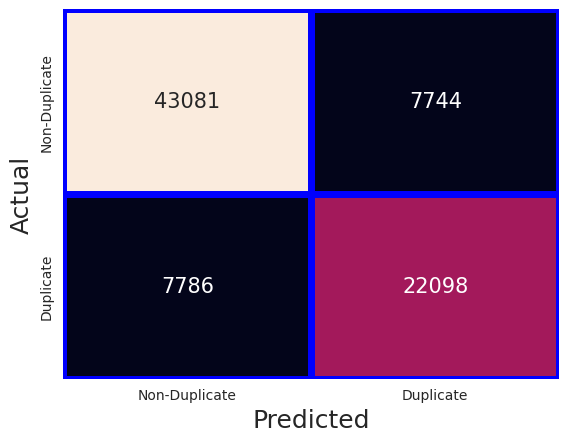

----------------------------------------------------------
Out of 80709 testing values 15530 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.85      0.85      0.85     50825
           1       0.74      0.74      0.74     29884

    accuracy                           0.81     80709
   macro avg       0.79      0.79      0.79     80709
weighted avg       0.81      0.81      0.81     80709

----------------------------------------------------------


In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import pickle
with mlflow.start_run():
    mlflow.set_tag("Owner","Suraj H")
    mlflow.set_tag("Algorithm", "XG Boost tfidf")
    
    xgb_classifier=XGBClassifier()
    xgb_classifier.fit(x_train_tf,y_train)
    pickle.dump(xgb_classifier, open("/content/resources_advance_approach_using_extracted_features/xgboost_tfidf.pkl","wb"))
    
    y_pred=xgb_classifier.predict(x_test_tf)
    acc=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    
    print("----------------------------------------------------------")
    print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
    print("----------------------------------------------------------")
    print("Confusion Matrix=\n")
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
                yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
    plt.xlabel("Predicted",fontsize=18)
    plt.ylabel("Actual",fontsize=18)
    plt.savefig("/content/resources_advance_approach_using_extracted_features/xgboost_tfidf_conf_matrix.png")
    plt.show()
    print("----------------------------------------------------------")
    print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
    print("----------------------------------------------------------")
    print("Classification Report=\n", classification_report(y_test,y_pred))
    print("----------------------------------------------------------")
    
    mlflow.log_metrics({"Accuracy":acc, "Precision":precision, "Recall":recall, "F1 Score":f1})
    mlflow.sklearn.log_model(xgb_classifier, artifact_path="models")
    mlflow.log_artifact("/content/resources_advance_approach_using_extracted_features/xgboost_tfidf_conf_matrix.png")

**<code style="color:green">Inference:<br>1. Accuracy of the XG Boost Classifier is 81%. <br>2. Out of total non-duplicate predicted class 84% are accurate and Out of total duplicate predicted class 75% are accurate.<br>3. Out of total actual non-duplicates class 86% are predicted accuractely and Out of total actual duplicates class 72% are predicted accuractely.<br>4. f1 score for non-duplicate class is 85% and for duplicate class is 74%.<br>5. f1 score for both the classes should be high.<br>6. False Negative count is very less hence XGBoost is suitable model.</code>**

**+---------------------------------+-------------------------------------------+------------------------------------------+-----------------------------------------+--------------------------------------+ +---------------------------------+-------------------------------------------+------------------------------------------+-----------------------------------------+--------------------------------------+**

In [28]:
import shutil
shutil.make_archive('mlruns', 'zip', 'mlruns')

shutil.make_archive('resources_advance_approach_using_extracted_features', 'zip', 'resources_advance_approach_using_extracted_features')

'/content/resources_advance_approach_using_extracted_features.zip'